In [1]:
import pandas as pd
import numpy as np

data_20psi_dfs = []
data_40psi_dfs = []
data_60psi_dfs = []

def outV2press(Vout):
    Vsupply = 5.0
    Pmin = 0
    Pmax = 100
    
    ((Pmax - Pmin)*(Vout - 0.1*Vsupply))/(0.8*Vsupply) + Pmin

    return ((Pmax - Pmin)*(Vout - 0.1*Vsupply))/(0.8*Vsupply) + Pmin

for i in range(1,12):
    data_20psi_dfs.append(pd.read_csv(f'/media/curtis/CCJ/pressure_data/20psi_source/NewFile{i}.csv', usecols = ['X', 'CH1', 'CH2', 'Increment']))
    data_40psi_dfs.append(pd.read_csv(f'/media/curtis/CCJ/pressure_data/40psi_source/NewFile{i}.csv', usecols = ['X', 'CH1', 'CH2', 'Increment']))
    data_60psi_dfs.append(pd.read_csv(f'/media/curtis/CCJ/pressure_data/60psi_source/NewFile{i}.csv', usecols = ['X', 'CH1', 'CH2', 'Increment']))

    #add column of timestamps using the increment value (dt)
    dt_20psi = data_20psi_dfs[i-1]['Increment'].iloc[0]
    dt_40psi = data_40psi_dfs[i-1]['Increment'].iloc[0]
    dt_60psi = data_60psi_dfs[i-1]['Increment'].iloc[0]


    #delete increment column and the first second row
    data_20psi_dfs[i-1].drop('Increment', axis=1, inplace=True)
    data_40psi_dfs[i-1].drop('Increment', axis=1, inplace=True)
    data_60psi_dfs[i-1].drop('Increment', axis=1, inplace=True)

    data_20psi_dfs[i-1].drop(0, axis=0, inplace=True)
    data_40psi_dfs[i-1].drop(0, axis=0, inplace=True)
    data_60psi_dfs[i-1].drop(0, axis=0, inplace=True)

    #reset index
    data_20psi_dfs[i-1].reset_index(drop=True, inplace=True)
    data_40psi_dfs[i-1].reset_index(drop=True, inplace=True)
    data_60psi_dfs[i-1].reset_index(drop=True, inplace=True)


    #convert to numeric types for all columns
    data_20psi_dfs[i-1] = data_20psi_dfs[i-1].astype(np.float64)
    data_40psi_dfs[i-1] = data_40psi_dfs[i-1].astype(np.float64)
    data_60psi_dfs[i-1] = data_60psi_dfs[i-1].astype(np.float64)

    # print(data_20psi_dfs[i-1].dtypes)
    # add timestamp column using dts saved above
    data_20psi_dfs[i-1]['Time'] = data_20psi_dfs[i-1]['X'] * dt_20psi
    data_40psi_dfs[i-1]['Time'] = data_40psi_dfs[i-1]['X'] * dt_40psi
    data_60psi_dfs[i-1]['Time'] = data_60psi_dfs[i-1]['X'] * dt_60psi

    #remove X columns
    data_20psi_dfs[i-1].drop('X', axis=1, inplace=True)
    data_40psi_dfs[i-1].drop('X', axis=1, inplace=True)
    data_60psi_dfs[i-1].drop('X', axis=1, inplace=True)

    #rename CH1 to be input, and Ch2 to be output
    data_20psi_dfs[i-1].rename(columns={'CH1':'Input', 'CH2':'Output'}, inplace=True)
    data_40psi_dfs[i-1].rename(columns={'CH1':'Input', 'CH2':'Output'}, inplace=True)
    data_60psi_dfs[i-1].rename(columns={'CH1':'Input', 'CH2':'Output'}, inplace=True)

    #add pressure values
    data_20psi_dfs[i-1]['Pressure'] = data_20psi_dfs[i-1]['Output'].apply(outV2press)
    data_40psi_dfs[i-1]['Pressure'] = data_40psi_dfs[i-1]['Output'].apply(outV2press)
    data_60psi_dfs[i-1]['Pressure'] = data_60psi_dfs[i-1]['Output'].apply(outV2press)


In [2]:
data_20psi_dfs[2].head()

,Input,Output,Time,Pressure
0,1.22,1.08,0.00,14.5
1,1.26,1.16,0.05,16.5
2,1.22,1.16,0.10,16.5
3,1.26,1.08,0.15,14.5
4,1.22,1.16,0.20,16.5


In [3]:
data_40psi_dfs[7].head()

,Input,Output,Time,Pressure
0,0.00,0.60,0.00,2.5
1,0.08,0.44,0.01,-1.5
2,0.00,0.60,0.02,2.5
3,0.08,0.44,0.03,-1.5
4,0.00,0.60,0.04,2.5


In [4]:
data_60psi_dfs[-1].head()


,Input,Output,Time,Pressure
0,0.00,0.60,0.00,2.5
1,0.08,0.44,0.01,-1.5
2,0.00,0.44,0.02,-1.5
3,0.08,0.60,0.03,2.5
4,0.00,0.60,0.04,2.5


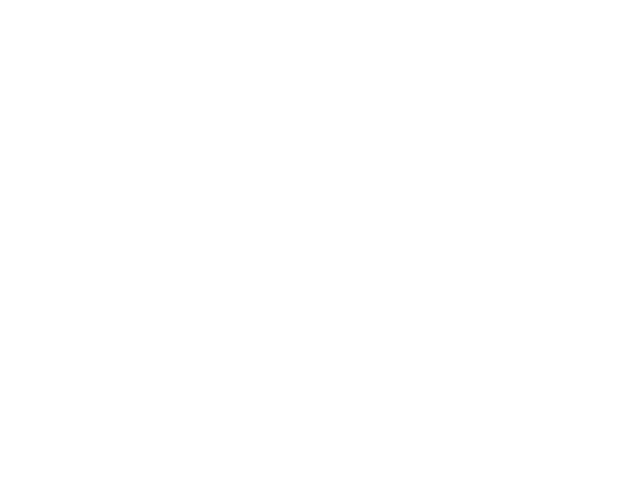

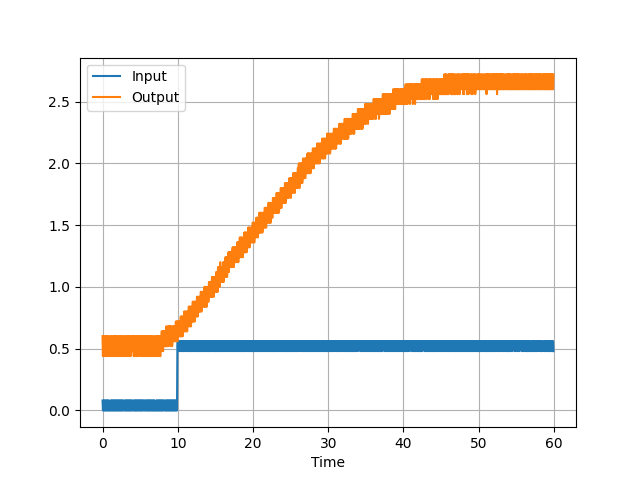

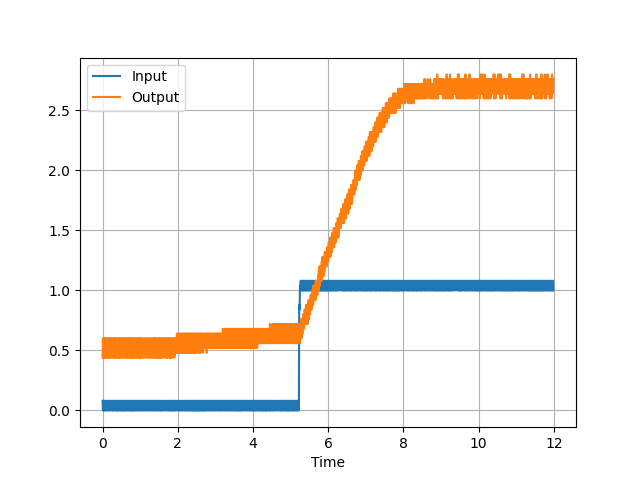

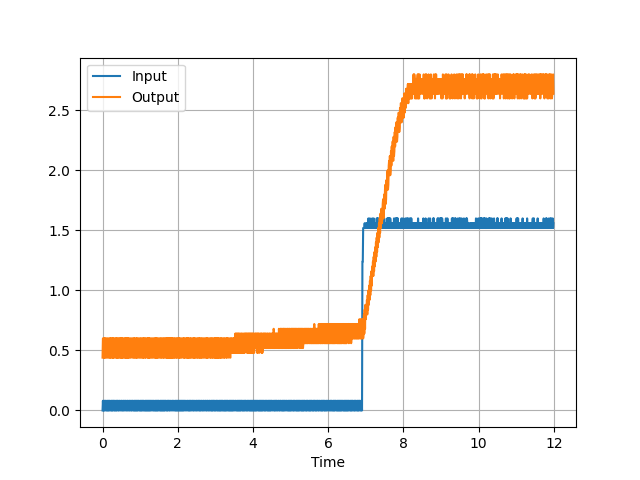

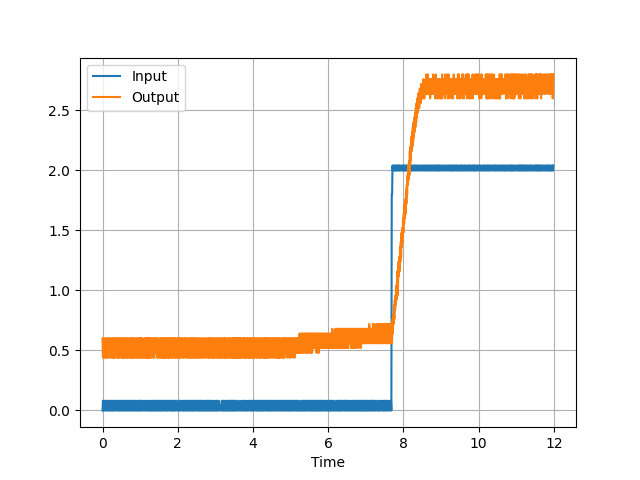

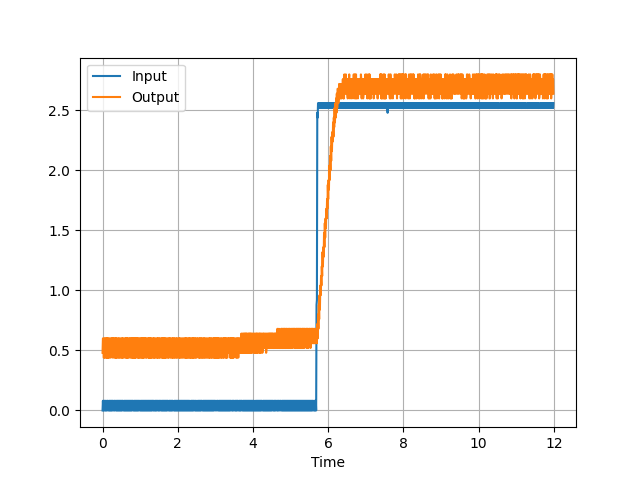

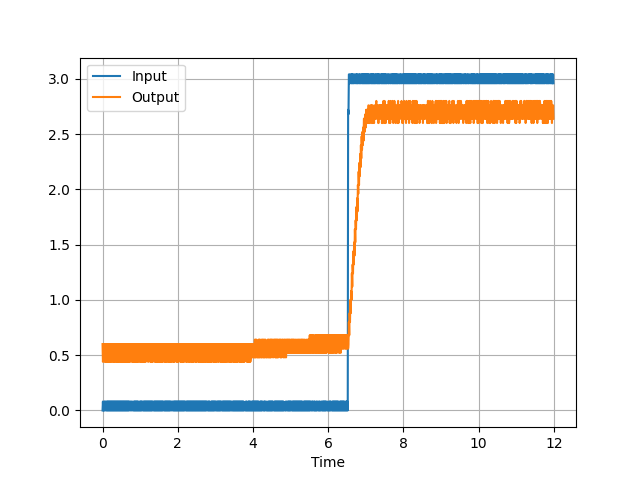

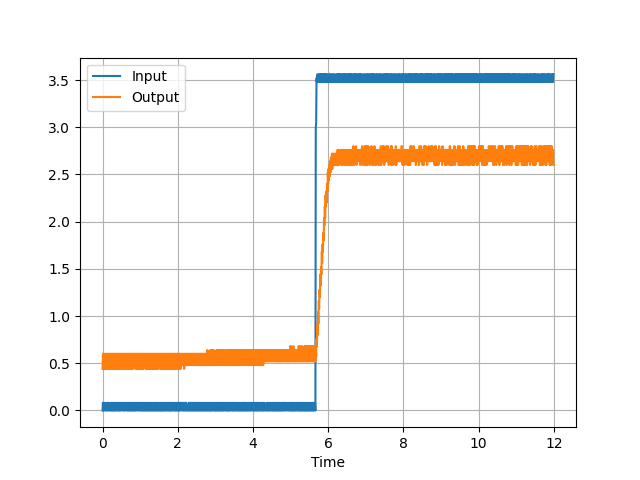

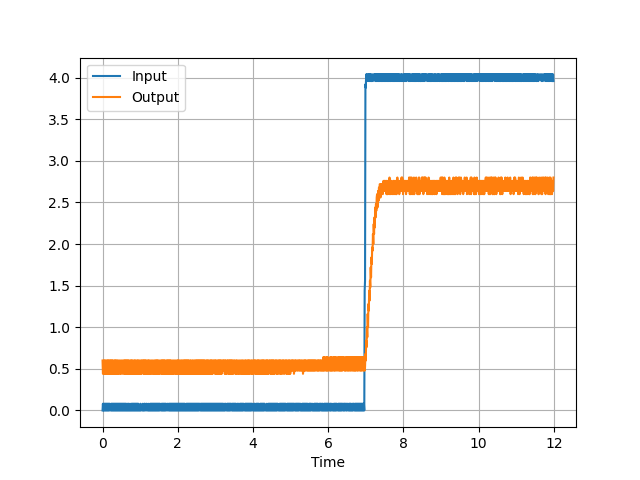

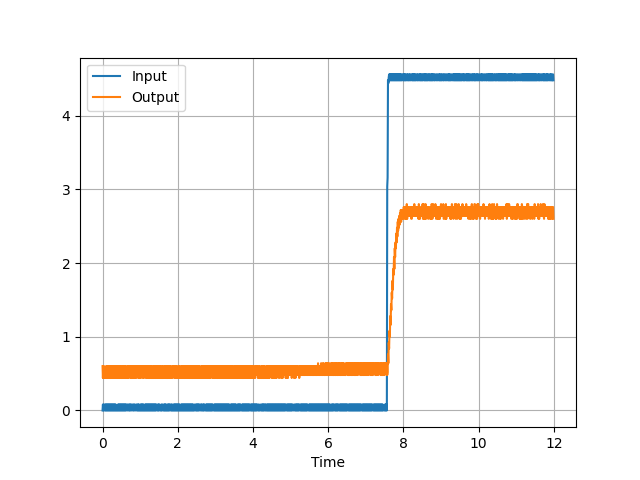

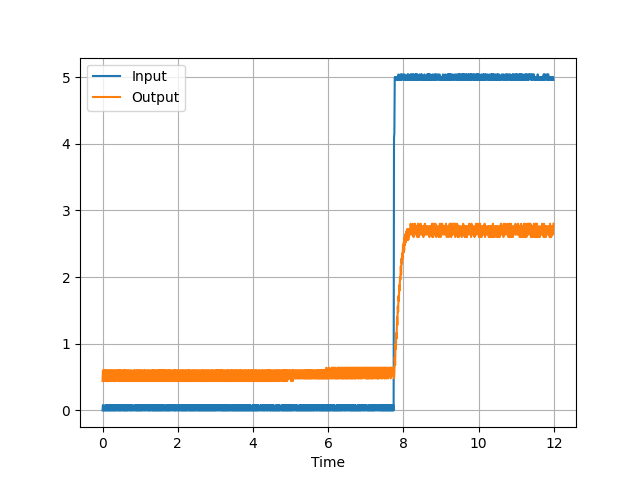

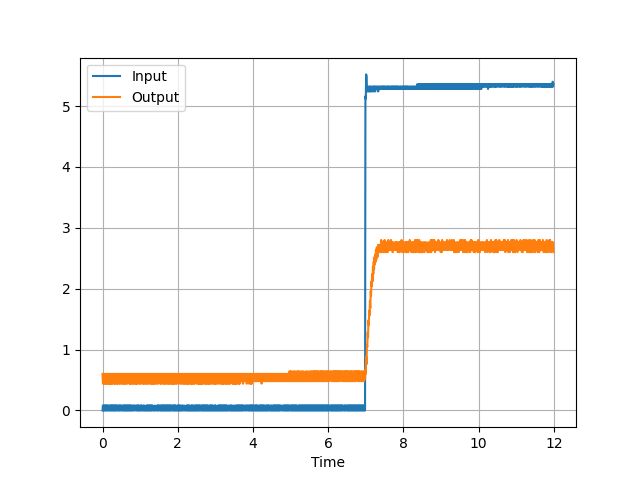

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
for i in range(11):
    plt.figure(i+1)
    # print(i)
    # data_20psi_dfs[i].plot(x='Time', y=['Input', 'Output'], grid=True)
    # data_40psi_dfs[i].plot(x='Time', y=['Input', 'Pressure'], grid=True)
    data_60psi_dfs[i].plot(x='Time', y=['Input', 'Output'], grid=True)


#20 psi data is messed up....
#40 psi data is also kinda messed up. Doesn't go to same voltage level
# 60 psi messed up: none


In [6]:
cleaned_data_20psi_dfs = []
cleaned_data_40psi_dfs = []
cleaned_data_60psi_dfs = []

#not including 0 because of different time scale
for j in range(1,11):
    idx20 = data_20psi_dfs[j][data_20psi_dfs[j]['Input'] > 0.2].index[0]
    idx40 = data_40psi_dfs[j][data_40psi_dfs[j]['Input'] > 0.2].index[0]
    idx60 = data_60psi_dfs[j][data_60psi_dfs[j]['Input'] > 0.2].index[0]

    dftmp20 = data_20psi_dfs[j].iloc[idx20-100:idx20+400].copy()
    dftmp40 = data_40psi_dfs[j].iloc[idx40-100:idx40+400].copy()
    dftmp60 = data_60psi_dfs[j].iloc[idx60-100:idx60+400].copy()

    #make start time 0
    # dftmp20['Time'] = dftmp20['Time'] - dftmp20['Time'].iloc[0] #uncomment after taking better data
    dftmp40['Time'] = dftmp40['Time'] - dftmp40['Time'].iloc[0]
    dftmp60['Time'] = dftmp60['Time'] - dftmp60['Time'].iloc[0]

    cleaned_data_20psi_dfs.append(dftmp20)
    cleaned_data_40psi_dfs.append(dftmp40)
    cleaned_data_60psi_dfs.append(dftmp60)
    


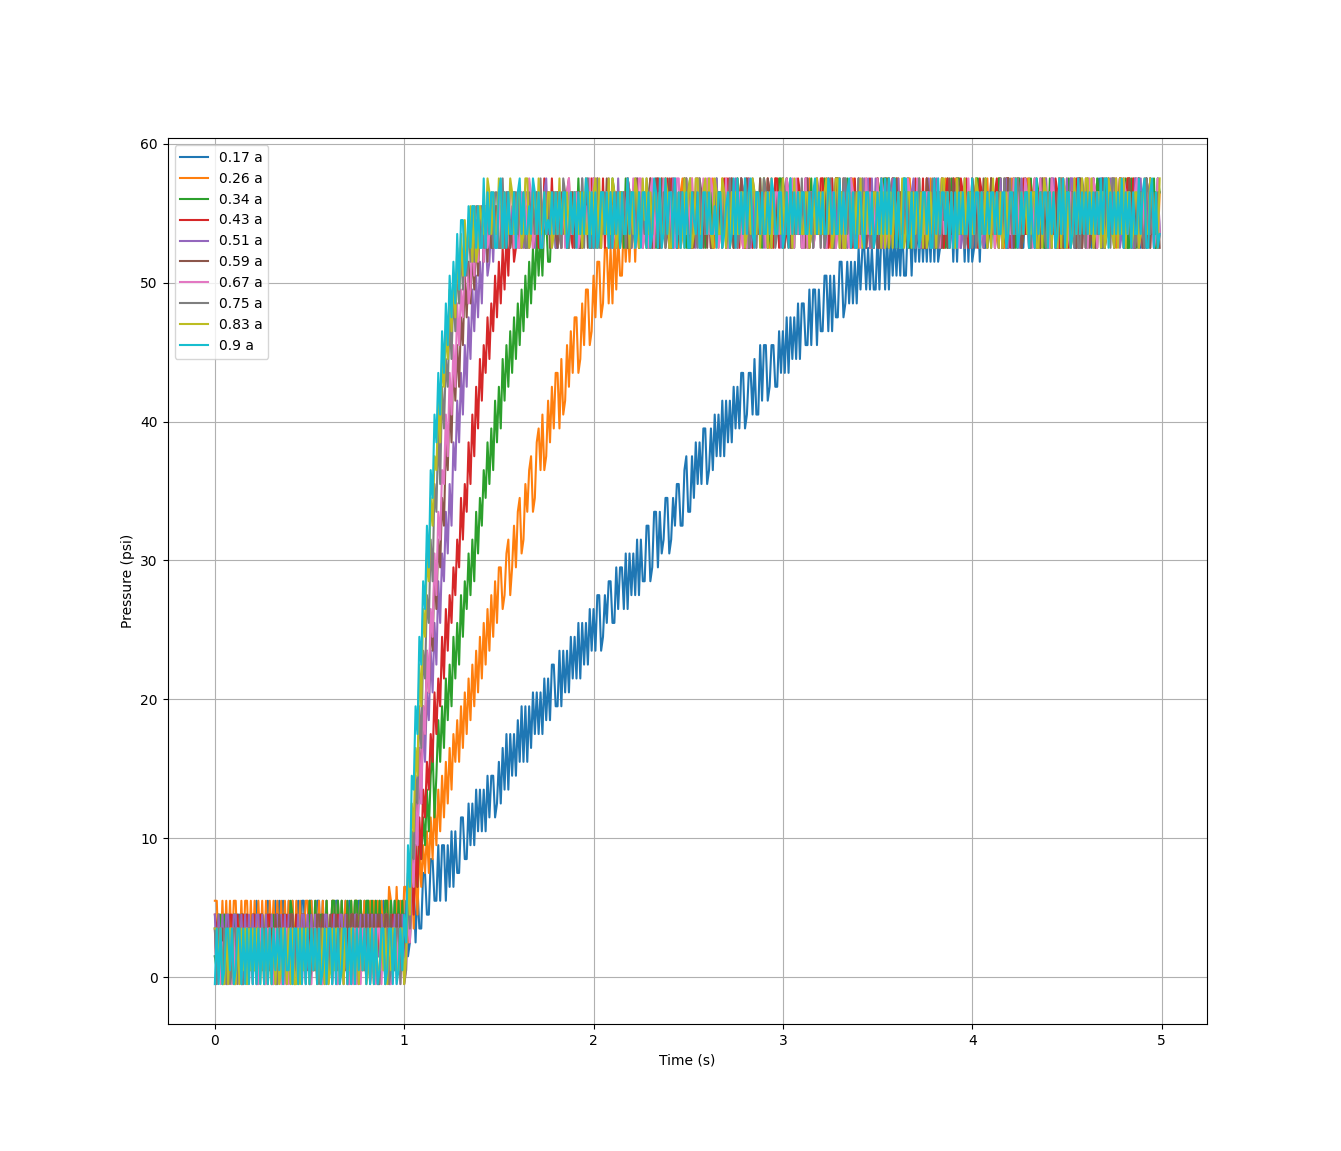

In [8]:
plt.figure('60 psi Pressure Step Response')
plt.clf()
voltages = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]
currents = [.17,.26,.34,.43,.51,.59,.67,.75,.83,.9]

def current2area(i):
    #see onenote page. This function was from smax function in tassa paper with  U = .12 amps.
    #i is current in amps
    area_per = 56.8181818181818*np.sqrt((i - 0.12)**2 + 7.744e-5) + 56.8181818181818*np.sqrt((i + 0.12)**2 + 7.744e-5) - 13.6363636363636
    #return percentage of max orifice area
    return area_per

#25 mm^2 for large valve
areas = [25*np.round(current2area(i), 2)/100 for i in currents]


for i in range(10):
    
    plt.plot(cleaned_data_60psi_dfs[i]['Time'], cleaned_data_60psi_dfs[i]['Pressure'], label=f'{currents[i]} a')

plt.legend()
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Pressure (psi)')
plt.show()


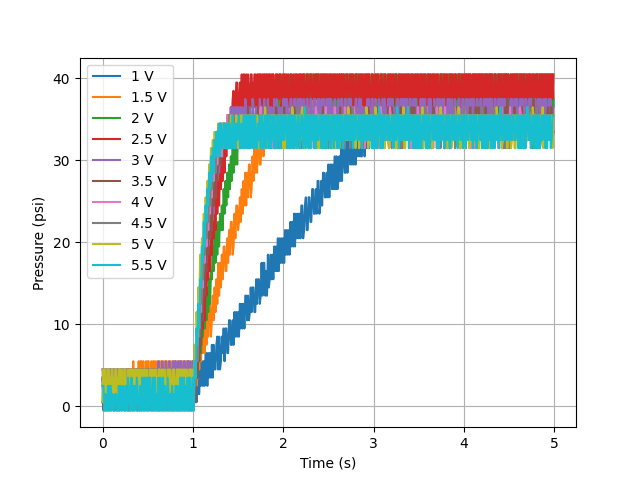

In [8]:
plt.figure('40 psi Pressure Step Response')
plt.clf()
voltages = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]

for i in range(10):
    
    plt.plot(cleaned_data_40psi_dfs[i]['Time'], cleaned_data_40psi_dfs[i]['Pressure'], label=f'{voltages[i]} V')

plt.legend()
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Pressure (psi)')
plt.show()

I think long term, I need data (both up and down steps) with inputs being voltage and supply pressure in one big csv. Then I think I can try to do some damage with that in gekko.

Up and down steps will allow me to see the outflow rate limits as well. 